In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
37653,37653,68493,62681,How can I not get bored?,How can one never be bored?,0
398073,398073,531275,531276,Does the Big Bang infinitely repeat itself?,What if the big bang keeps repeating itself an...,1
385815,385815,517977,517978,Why was the drill sergeant so hard on Private ...,What specific elements of Full Metal Jacket ma...,0
205131,205131,308195,308196,What are some baby boy name starting with Mo?,What are some baby girl names starting with Mo?,0
65626,65626,113860,113861,What is the best way to self teach?,How do I self teach economics?,0
87038,87038,146660,61020,What will happen if I delete my whatsapp accou...,How do I retrieve deleted Snapchat messages?,0
119758,119758,194377,194378,What is Power Testro?,What does Power Testro contains?,0
190073,190073,76478,104319,What is the difference between the syllabus of...,What is the difference between the CAT and GMA...,1
299923,299923,101698,68832,Did Hillary Clinton use Donald Trump as a way ...,Is it possible that Donald Trump is in cahoots...,1
115775,115775,188730,188731,How do I hide self harm cuts at school? I have...,Why in India people wear coats and blazers?,0


# Basic EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
df.duplicated().sum()

0

is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

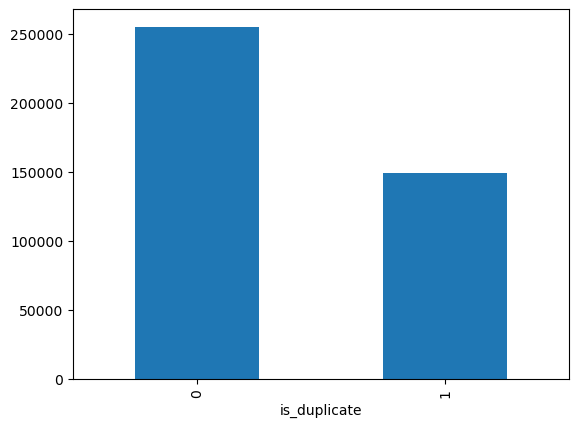

In [7]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [8]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of uniques questions : ',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of question getting repeated : ',x[x].shape[0])

Number of uniques questions :  537933
Number of question getting repeated :  111780


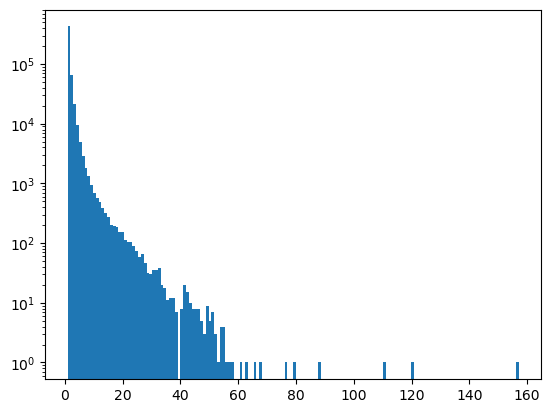

In [9]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

# BOW without any feature eng.

In [10]:
new_df = df.sample(30000)

In [11]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
304632,What are good masters programs in clinical psy...,What are some good clinical psychology masters...
328664,Who will 2017 up elections?,Who will win the UP elections?
81042,How can I schedule my events with Corporate Ev...,I want to work with some Ngo in Mumbai? Any su...
312964,What are the best car accessories technology?,What Are Good Accessories For Cars? Where Do T...
398407,What's Jennifer Aniston's relationship like wi...,Did Brad Pitt cheat on Jennifer Aniston? Why?


In [12]:
from sklearn.feature_extraction.text import CountVectorizer
question = list(ques_df['question1']) + list(ques_df['question2'])
cv = CountVectorizer(max_features=3000)
q1_arr,q2_arr = np.vsplit(cv.fit_transform(question).toarray(),2)

In [13]:
temp_df1 = pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arr,index=ques_df.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [14]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(temp_df.drop(columns=['is_duplicate']),temp_df['is_duplicate'],test_size=0.2,random_state=1)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7448333333333333

# BOW with basic FE

In [17]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [18]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
304632,304632,396394,427914,What are good masters programs in clinical psy...,What are some good clinical psychology masters...,1,54,56
328664,328664,115304,183067,Who will 2017 up elections?,Who will win the UP elections?,1,27,30
81042,81042,137665,137666,How can I schedule my events with Corporate Ev...,I want to work with some Ngo in Mumbai? Any su...,0,70,56
312964,312964,284791,254468,What are the best car accessories technology?,What Are Good Accessories For Cars? Where Do T...,1,45,71
398407,398407,494168,337256,What's Jennifer Aniston's relationship like wi...,Did Brad Pitt cheat on Jennifer Aniston? Why?,0,59,45


In [19]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row:len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row:len(row.split(" ")))

In [20]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
304632,304632,396394,427914,What are good masters programs in clinical psy...,What are some good clinical psychology masters...,1,54,56,8,8
328664,328664,115304,183067,Who will 2017 up elections?,Who will win the UP elections?,1,27,30,5,6


In [21]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    # strip method removes the extra whitespace at start or end of statement
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [22]:
new_df['word_common'] = new_df.apply(common_words,axis=1)

In [23]:
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
304632,304632,396394,427914,What are good masters programs in clinical psy...,What are some good clinical psychology masters...,1,54,56,8,8,5
328664,328664,115304,183067,Who will 2017 up elections?,Who will win the UP elections?,1,27,30,5,6,4


In [24]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1) + len(w2)

In [25]:
new_df['word_total'] = new_df.apply(total_words,axis=1)
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
304632,304632,396394,427914,What are good masters programs in clinical psy...,What are some good clinical psychology masters...,1,54,56,8,8,5,16
328664,328664,115304,183067,Who will 2017 up elections?,Who will win the UP elections?,1,27,30,5,6,4,11


In [26]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
304632,304632,396394,427914,What are good masters programs in clinical psy...,What are some good clinical psychology masters...,1,54,56,8,8,5,16,0.31
328664,328664,115304,183067,Who will 2017 up elections?,Who will win the UP elections?,1,27,30,5,6,4,11,0.36


minimum characters 1
maximum characters 340
average num of characters 59


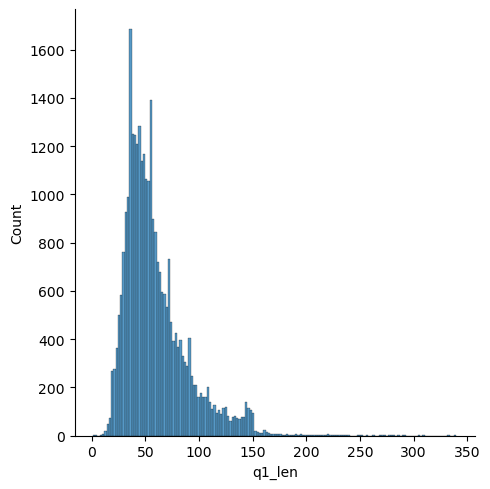

In [27]:
# analysis of features
sns.displot(new_df['q1_len'])
print("minimum characters",new_df['q1_len'].min())
print("maximum characters",new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

minimum characters 1
maximum characters 1169
average num of characters 60


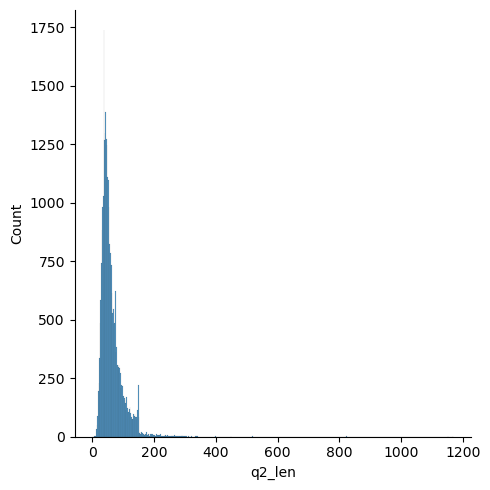

In [28]:
# analysis of features
sns.displot(new_df['q2_len'])
print("minimum characters",new_df['q2_len'].min())
print("maximum characters",new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum characters 1
maximum characters 73
average num of characters 10


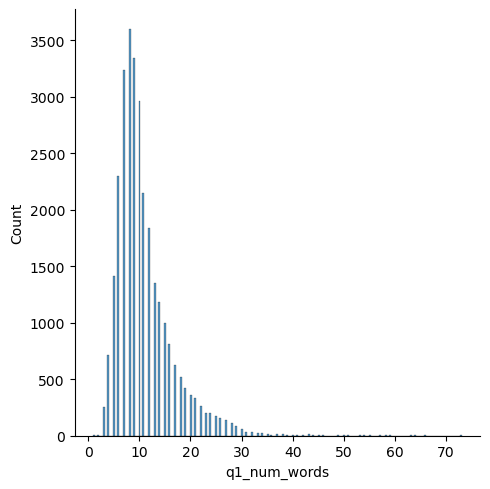

In [29]:
# analysis of features
sns.displot(new_df['q1_num_words'])
print("minimum characters",new_df['q1_num_words'].min())
print("maximum characters",new_df['q1_num_words'].max())
print('average num of characters',int(new_df['q1_num_words'].mean()))

minimum characters 1
maximum characters 237
average num of characters 11


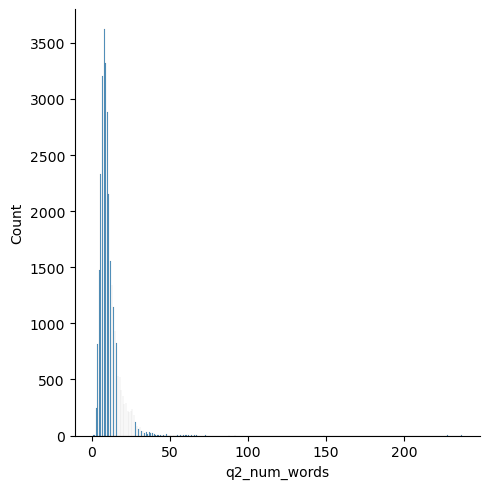

In [30]:
# analysis of features
sns.displot(new_df['q2_num_words'])
print("minimum characters",new_df['q2_num_words'].min())
print("maximum characters",new_df['q2_num_words'].max())
print('average num of characters',int(new_df['q2_num_words'].mean()))

C:\Users\tusha\AppData\Local\Temp\ipykernel_1256\4077078908.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='non duplicate')
C:\Users\tusha\AppData\Local\Temp\ipykernel_1256\4077078908.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

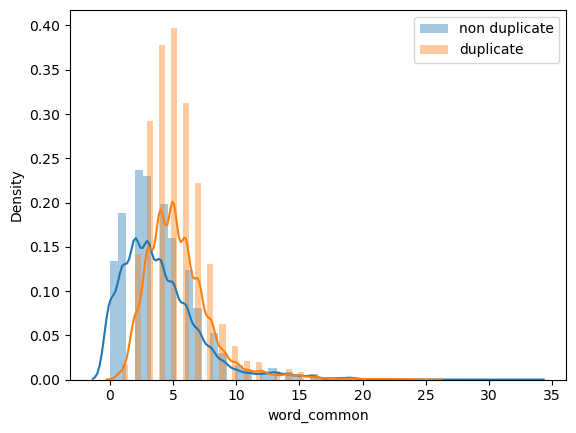

In [31]:
sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'],label='duplicate')
plt.legend()
plt.show()

C:\Users\tusha\AppData\Local\Temp\ipykernel_1256\1245245008.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='non duplicate')
C:\Users\tusha\AppData\Local\Temp\ipykernel_1256\1245245008.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(n

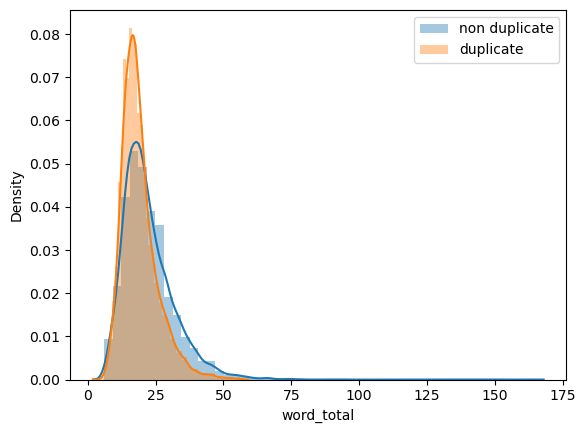

In [32]:
sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'],label='duplicate')
plt.legend()
plt.show()

C:\Users\tusha\AppData\Local\Temp\ipykernel_1256\372608964.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='non duplicate')
C:\Users\tusha\AppData\Local\Temp\ipykernel_1256\372608964.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new

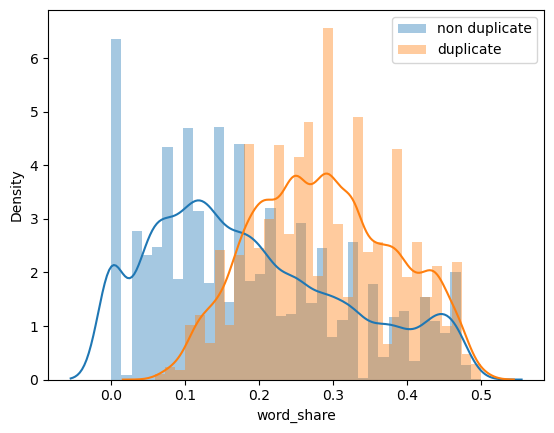

In [33]:
sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [34]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
final_df.head()

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
304632,1,54,56,8,8,5,16,0.31
328664,1,27,30,5,6,4,11,0.36
81042,0,70,56,12,11,3,23,0.13
312964,1,45,71,7,12,4,19,0.21
398407,0,59,45,8,8,2,16,0.12


In [35]:
temp_df = temp_df.drop(columns=['is_duplicate'])
final_df = pd.concat([final_df,temp_df],axis=1)
final_df.shape

(30000, 6008)

In [36]:
final_df.head(2)

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
304632,1,54,56,8,8,5,16,0.31,0,0,...,0,0,0,0,0,0,0,0,0,0
328664,1,27,30,5,6,4,11,0.36,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
final_df['is_duplicate'].dtype

dtype('int64')

In [38]:
X_train,X_test,y_train,y_test = train_test_split(final_df.drop(columns=['is_duplicate']),final_df['is_duplicate'],test_size=0.2,random_state=1)

In [39]:
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

In [40]:
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7601666666666667

## Advanced Features
### 1. Token Features
### cwc_min: This is the ratio of the number of common words to the length of the smaller question
### cwc_max: This is the ratio of the number of common words to the length of the larger question
### csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions
### csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions
### ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions
### ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions
### last_word_eq: 1 if the last word in the two questions is same, 0 otherwise
### first_word_eq: 1 if the first word in the two questions is same, 0 otherwise
### 2. Length Based Features
### mean_len: Mean of the length of the two questions (number of words)
### abs_len_diff: Absolute difference between the length of the two questions (number of words)
### longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question
### 3. Fuzzy Features
### fuzz_ratio: fuzz_ratio score from fuzzywuzzy
### fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
### token_sort_ratio: token_sort_ratio from fuzzywuzzy
### token_set_ratio: token_set_ratio from fuzzywuzzy